In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [3]:
data = pd.read_csv('obesitas.csv')
data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [5]:
data['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [6]:
data.columns = ['Usia','Jenis Kelamin', 'Tinggi Badan', 'Berat Badan', 'Konsumsi Alkohol', 'Konsumsi Makanan Tinggi Kalori',
       'Frekuensi Konsumsi Sayuran', 'Jumlah Makan Utama', 'Pemantauan Konsumsi Kalori', 'Merokok', 'Konsumsi Air Harian', 'Riwayat Keluarga dengan Kegemukan', 'Frekuensi Aktivitas Fisik', 'Waktu Menggunakan Perangkat Teknologi',
       'Konsumsi Makanan di Antara Waktu Makan', 'Transportasi yang Digunakan', 'Obesitas']

data

,Usia,Jenis Kelamin,Tinggi Badan,Berat Badan,Konsumsi Alkohol,Konsumsi Makanan Tinggi Kalori,Frekuensi Konsumsi Sayuran,Jumlah Makan Utama,Pemantauan Konsumsi Kalori,Merokok,Konsumsi Air Harian,Riwayat Keluarga dengan Kegemukan,Frekuensi Aktivitas Fisik,Waktu Menggunakan Perangkat Teknologi,Konsumsi Makanan di Antara Waktu Makan,Transportasi yang Digunakan,Obesitas
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [7]:
data.isna().sum()

Usia                                      0
Jenis Kelamin                             0
Tinggi Badan                              0
Berat Badan                               0
Konsumsi Alkohol                          0
Konsumsi Makanan Tinggi Kalori            0
Frekuensi Konsumsi Sayuran                0
Jumlah Makan Utama                        0
Pemantauan Konsumsi Kalori                0
Merokok                                   0
Konsumsi Air Harian                       0
Riwayat Keluarga dengan Kegemukan         0
Frekuensi Aktivitas Fisik                 0
Waktu Menggunakan Perangkat Teknologi     0
Konsumsi Makanan di Antara Waktu Makan    0
Transportasi yang Digunakan               0
Obesitas                                  0
dtype: int64

In [8]:
data = data.drop_duplicates()
data

,Usia,Jenis Kelamin,Tinggi Badan,Berat Badan,Konsumsi Alkohol,Konsumsi Makanan Tinggi Kalori,Frekuensi Konsumsi Sayuran,Jumlah Makan Utama,Pemantauan Konsumsi Kalori,Merokok,Konsumsi Air Harian,Riwayat Keluarga dengan Kegemukan,Frekuensi Aktivitas Fisik,Waktu Menggunakan Perangkat Teknologi,Konsumsi Makanan di Antara Waktu Makan,Transportasi yang Digunakan,Obesitas
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Usia                                    2087 non-null   float64
 1   Jenis Kelamin                           2087 non-null   object 
 2   Tinggi Badan                            2087 non-null   float64
 3   Berat Badan                             2087 non-null   float64
 4   Konsumsi Alkohol                        2087 non-null   object 
 5   Konsumsi Makanan Tinggi Kalori          2087 non-null   object 
 6   Frekuensi Konsumsi Sayuran              2087 non-null   float64
 7   Jumlah Makan Utama                      2087 non-null   float64
 8   Pemantauan Konsumsi Kalori              2087 non-null   object 
 9   Merokok                                 2087 non-null   object 
 10  Konsumsi Air Harian                     2087 non-null   float64
 

In [10]:
data.describe()
data

,Usia,Jenis Kelamin,Tinggi Badan,Berat Badan,Konsumsi Alkohol,Konsumsi Makanan Tinggi Kalori,Frekuensi Konsumsi Sayuran,Jumlah Makan Utama,Pemantauan Konsumsi Kalori,Merokok,Konsumsi Air Harian,Riwayat Keluarga dengan Kegemukan,Frekuensi Aktivitas Fisik,Waktu Menggunakan Perangkat Teknologi,Konsumsi Makanan di Antara Waktu Makan,Transportasi yang Digunakan,Obesitas
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [11]:
# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=["Obesitas"])  # Fitur prediktor
y = data["Obesitas"]                # Target

In [12]:
data['Obesitas'] = data['Obesitas'].apply(lambda x: x.replace('_', ' '))
data['Transportasi yang Digunakan'] = data['Transportasi yang Digunakan'].apply(lambda x: x.replace('_', ' '))

data['Tinggi Badan'] = data['Tinggi Badan'].round(1)
data['Berat Badan'] = data['Berat Badan'].round(1)
data['Usia'] = data['Usia'].round(1)
data

C:\Users\asus\AppData\Local\Temp\ipykernel_10168\3439887803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Obesitas'] = data['Obesitas'].apply(lambda x: x.replace('_', ' '))
C:\Users\asus\AppData\Local\Temp\ipykernel_10168\3439887803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Transportasi yang Digunakan'] = data['Transportasi yang Digunakan'].apply(lambda x: x.replace('_', ' '))
C:\Users\asus\AppData\Local\Temp\ipykernel_10168\3439887803.py:4: SettingWithCopyWarning: 
A value is tr

,Usia,Jenis Kelamin,Tinggi Badan,Berat Badan,Konsumsi Alkohol,Konsumsi Makanan Tinggi Kalori,Frekuensi Konsumsi Sayuran,Jumlah Makan Utama,Pemantauan Konsumsi Kalori,Merokok,Konsumsi Air Harian,Riwayat Keluarga dengan Kegemukan,Frekuensi Aktivitas Fisik,Waktu Menggunakan Perangkat Teknologi,Konsumsi Makanan di Antara Waktu Makan,Transportasi yang Digunakan,Obesitas
0,21.0,Female,1.6,64.0,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public Transportation,Normal Weight
1,21.0,Female,1.5,56.0,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public Transportation,Normal Weight
2,23.0,Male,1.8,77.0,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public Transportation,Normal Weight
3,27.0,Male,1.8,87.0,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight Level I
4,22.0,Male,1.8,89.8,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public Transportation,Overweight Level II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,21.0,Female,1.7,131.4,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public Transportation,Obesity Type III
2107,22.0,Female,1.7,133.7,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public Transportation,Obesity Type III
2108,22.5,Female,1.8,133.7,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public Transportation,Obesity Type III
2109,24.4,Female,1.7,133.3,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public Transportation,Obesity Type III


In [13]:
for x in ['Frekuensi Konsumsi Sayuran', 'Jumlah Makan Utama', 'Konsumsi Air Harian',
          'Frekuensi Aktivitas Fisik', 'Waktu Menggunakan Perangkat Teknologi']:
    value = np.array(data[x])
    print(x, ':', 'min:', np.min(value), 'max:', np.max(value))

Frekuensi Konsumsi Sayuran : min: 1.0 max: 3.0
Jumlah Makan Utama : min: 1.0 max: 4.0
Konsumsi Air Harian : min: 1.0 max: 3.0
Frekuensi Aktivitas Fisik : min: 0.0 max: 3.0
Waktu Menggunakan Perangkat Teknologi : min: 0.0 max: 2.0


In [14]:
for x in ['Frekuensi Konsumsi Sayuran', 'Jumlah Makan Utama', 'Konsumsi Air Harian',
          'Frekuensi Aktivitas Fisik', 'Waktu Menggunakan Perangkat Teknologi']:
    data[x] = data[x].apply(round)  # Membulatkan nilai
    value = np.array(data[x])
    print(x, ':', 'min:', np.min(value), 'max:', np.max(value), data[x].dtype)
    print(data[x].unique())  # Menampilkan nilai unik pada kolom


Frekuensi Konsumsi Sayuran : min: 1 max: 3 int64
[2 3 1]
Jumlah Makan Utama : min: 1 max: 4 int64
[3 1 4 2]
Konsumsi Air Harian : min: 1 max: 3 int64
[2 3 1]
Frekuensi Aktivitas Fisik : min: 0 max: 3 int64
[0 3 2 1]
Waktu Menggunakan Perangkat Teknologi : min: 0 max: 2 int64
[1 0 2]


C:\Users\asus\AppData\Local\Temp\ipykernel_10168\1946777190.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x] = data[x].apply(round)  # Membulatkan nilai


In [15]:
mapping1 = {1: '1', 2: '2', 3: '3', 4: '3+'}
mapping2 = {1: '1', 2: '2', 3: '3'}
mapping3 = {0: '0', 1: '1', 2: '2', 3: '3'}
mapping4 = {0: '0', 1: '1', 2: '2'}

In [16]:
data['Jumlah Makan Utama'] =data['Jumlah Makan Utama'].replace(mapping1)
data['Konsumsi Air Harian'] = data['Konsumsi Air Harian'].replace(mapping2)
data['Frekuensi Aktivitas Fisik'] = data['Frekuensi Aktivitas Fisik'].replace(mapping3)
data['Waktu Menggunakan Perangkat Teknologi'] = data['Waktu Menggunakan Perangkat Teknologi'].replace(mapping4)
data

C:\Users\asus\AppData\Local\Temp\ipykernel_10168\3656696039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Jumlah Makan Utama'] =data['Jumlah Makan Utama'].replace(mapping1)
C:\Users\asus\AppData\Local\Temp\ipykernel_10168\3656696039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Konsumsi Air Harian'] = data['Konsumsi Air Harian'].replace(mapping2)
C:\Users\asus\AppData\Local\Temp\ipykernel_10168\3656696039.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,Usia,Jenis Kelamin,Tinggi Badan,Berat Badan,Konsumsi Alkohol,Konsumsi Makanan Tinggi Kalori,Frekuensi Konsumsi Sayuran,Jumlah Makan Utama,Pemantauan Konsumsi Kalori,Merokok,Konsumsi Air Harian,Riwayat Keluarga dengan Kegemukan,Frekuensi Aktivitas Fisik,Waktu Menggunakan Perangkat Teknologi,Konsumsi Makanan di Antara Waktu Makan,Transportasi yang Digunakan,Obesitas
0,21.0,Female,1.6,64.0,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public Transportation,Normal Weight
1,21.0,Female,1.5,56.0,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public Transportation,Normal Weight
2,23.0,Male,1.8,77.0,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public Transportation,Normal Weight
3,27.0,Male,1.8,87.0,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight Level I
4,22.0,Male,1.8,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public Transportation,Overweight Level II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,21.0,Female,1.7,131.4,Sometimes,yes,3,3,no,no,2,yes,2,1,Sometimes,Public Transportation,Obesity Type III
2107,22.0,Female,1.7,133.7,Sometimes,yes,3,3,no,no,2,yes,1,1,Sometimes,Public Transportation,Obesity Type III
2108,22.5,Female,1.8,133.7,Sometimes,yes,3,3,no,no,2,yes,1,1,Sometimes,Public Transportation,Obesity Type III
2109,24.4,Female,1.7,133.3,Sometimes,yes,3,3,no,no,3,yes,1,1,Sometimes,Public Transportation,Obesity Type III


In [17]:
categorical_columns = data.select_dtypes(include=['object']).columns
print("Kolom kategorikal:", categorical_columns)

Kolom kategorikal: Index(['Jenis Kelamin', 'Konsumsi Alkohol', 'Konsumsi Makanan Tinggi Kalori',
       'Jumlah Makan Utama', 'Pemantauan Konsumsi Kalori', 'Merokok',
       'Konsumsi Air Harian', 'Riwayat Keluarga dengan Kegemukan',
       'Frekuensi Aktivitas Fisik', 'Waktu Menggunakan Perangkat Teknologi',
       'Konsumsi Makanan di Antara Waktu Makan', 'Transportasi yang Digunakan',
       'Obesitas'],
      dtype='object')


In [18]:
from sklearn.preprocessing import LabelEncoder


label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


C:\Users\asus\AppData\Local\Temp\ipykernel_10168\3652739680.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
C:\Users\asus\AppData\Local\Temp\ipykernel_10168\3652739680.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
C:\Users\asus\AppData\Local\Temp\ipykernel_10168\3652739680.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [19]:
 data.head()

,Usia,Jenis Kelamin,Tinggi Badan,Berat Badan,Konsumsi Alkohol,Konsumsi Makanan Tinggi Kalori,Frekuensi Konsumsi Sayuran,Jumlah Makan Utama,Pemantauan Konsumsi Kalori,Merokok,Konsumsi Air Harian,Riwayat Keluarga dengan Kegemukan,Frekuensi Aktivitas Fisik,Waktu Menggunakan Perangkat Teknologi,Konsumsi Makanan di Antara Waktu Makan,Transportasi yang Digunakan,Obesitas
0,21.0,0,1.6,64.0,3,0,2,2,0,0,1,1,0,1,2,3,1
1,21.0,0,1.5,56.0,2,0,3,2,1,1,2,1,3,0,2,3,1
2,23.0,1,1.8,77.0,1,0,2,2,0,0,1,1,2,1,2,3,1
3,27.0,1,1.8,87.0,1,0,3,2,0,0,1,0,2,0,2,4,5
4,22.0,1,1.8,89.8,2,0,2,0,0,0,1,0,0,0,2,3,6


In [20]:
# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=["Obesitas"])  # Fitur prediktor
y = data["Obesitas"]                # Target

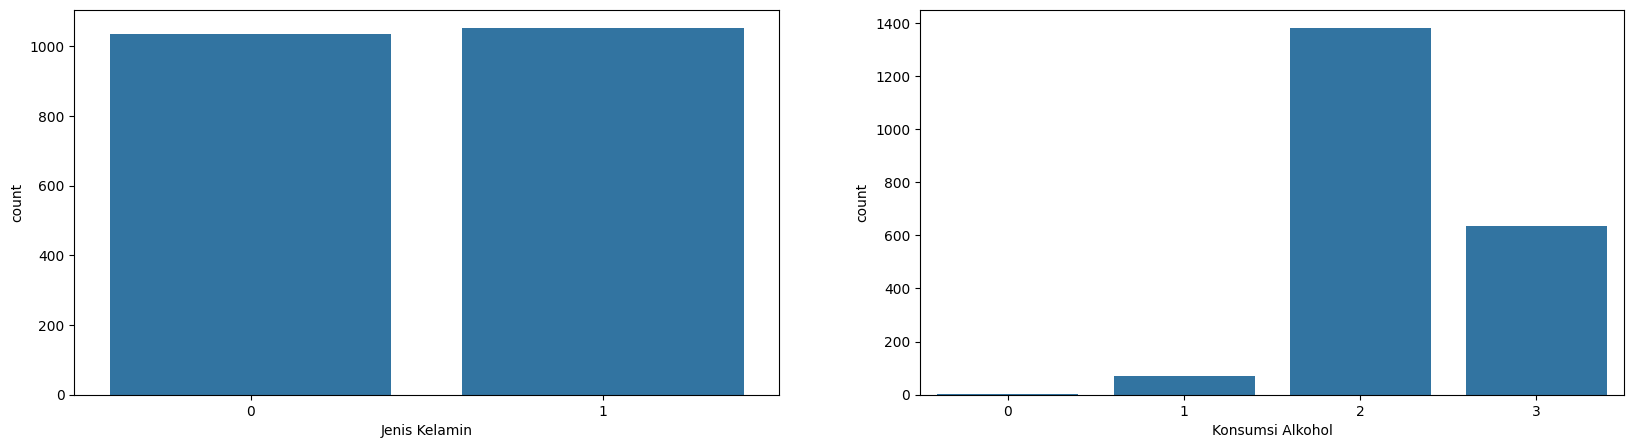

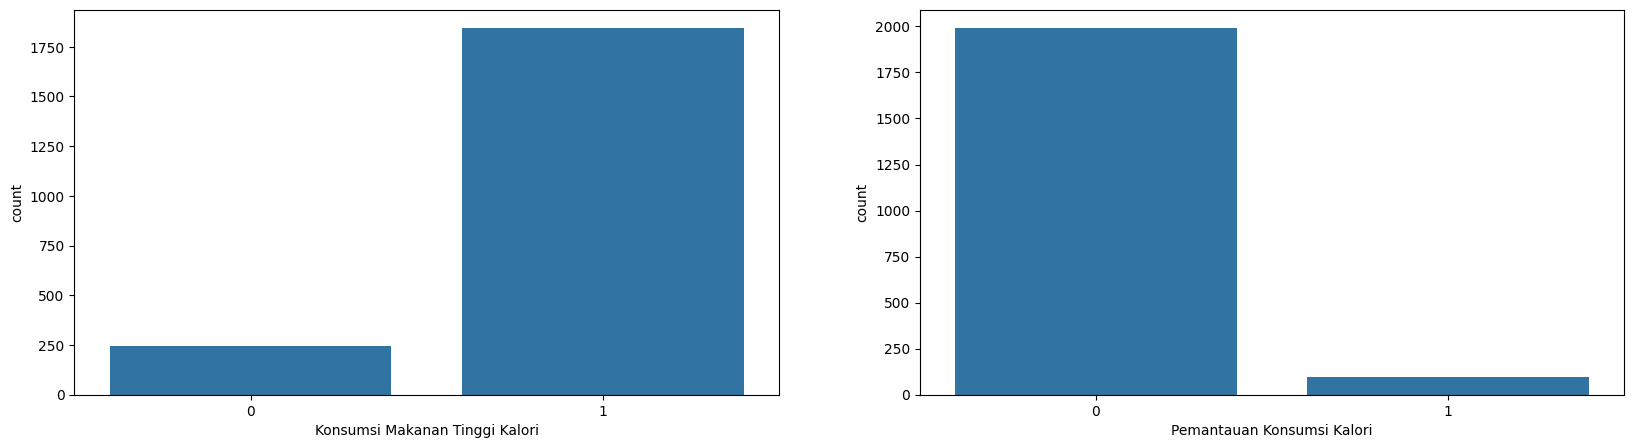

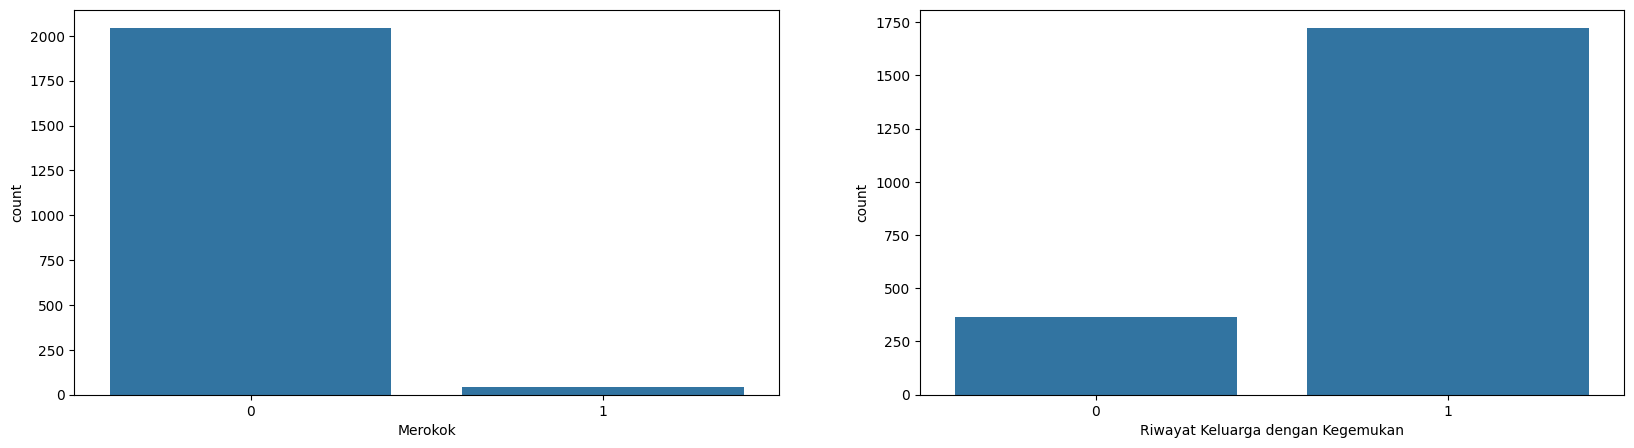

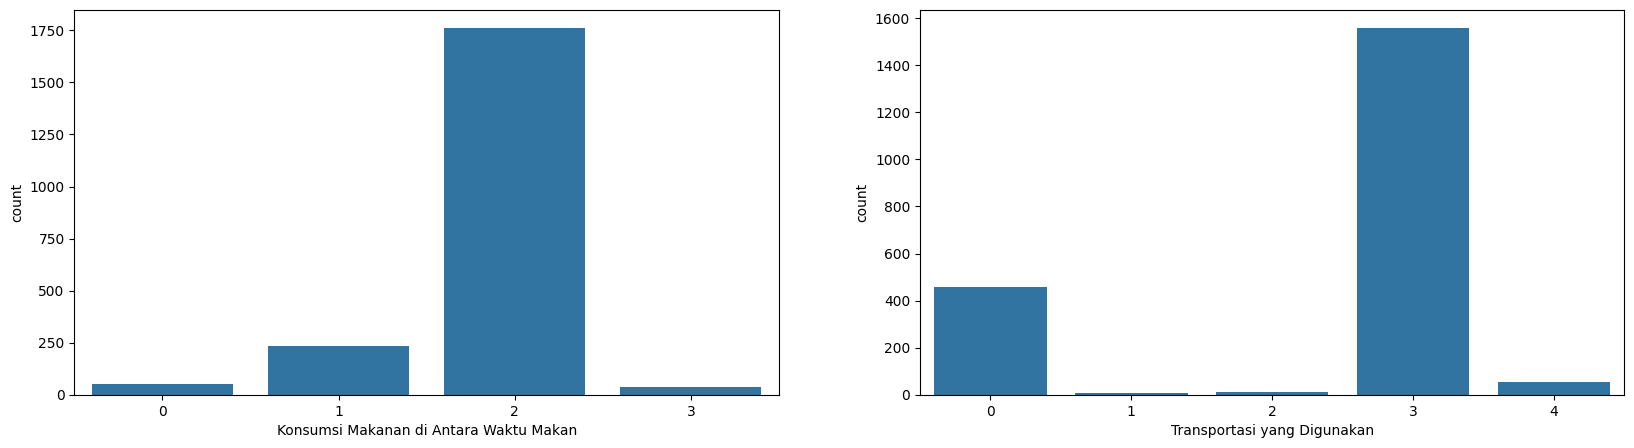

In [21]:
fig, axes = plt.subplots(1,2,figsize=(20,5))
sns.countplot(x='Jenis Kelamin',data=data,ax=axes[0])
sns.countplot(x='Konsumsi Alkohol',data=data,ax=axes[1])
fig, axes = plt.subplots(1,2,figsize=(20,5))
sns.countplot(x='Konsumsi Makanan Tinggi Kalori',data=data,ax=axes[0])
sns.countplot(x='Pemantauan Konsumsi Kalori',data=data,ax=axes[1])
fig, axes = plt.subplots(1,2,figsize=(20,5))
sns.countplot(x='Merokok',data=data,ax=axes[0])
sns.countplot(x='Riwayat Keluarga dengan Kegemukan',data=data,ax=axes[1])
fig, axes = plt.subplots(1,2,figsize=(20,5))
sns.countplot(x='Konsumsi Makanan di Antara Waktu Makan',data=data,ax=axes[0])
sns.countplot(x='Transportasi yang Digunakan',data=data,ax=axes[1])
plt.show()

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Usia                                    2087 non-null   float64
 1   Jenis Kelamin                           2087 non-null   int64  
 2   Tinggi Badan                            2087 non-null   float64
 3   Berat Badan                             2087 non-null   float64
 4   Konsumsi Alkohol                        2087 non-null   int64  
 5   Konsumsi Makanan Tinggi Kalori          2087 non-null   int64  
 6   Frekuensi Konsumsi Sayuran              2087 non-null   int64  
 7   Jumlah Makan Utama                      2087 non-null   int64  
 8   Pemantauan Konsumsi Kalori              2087 non-null   int64  
 9   Merokok                                 2087 non-null   int64  
 10  Konsumsi Air Harian                     2087 non-null   int64  
 

In [23]:
numerik = ['Usia','Jenis Kelamin', 'Tinggi Badan', 'Berat Badan', 'Konsumsi Alkohol', 'Konsumsi Makanan Tinggi Kalori',
                              'Frekuensi Konsumsi Sayuran', 'Jumlah Makan Utama', 'Pemantauan Konsumsi Kalori', 'Merokok',
                              'Konsumsi Air Harian', 'Riwayat Keluarga dengan Kegemukan', 'Frekuensi Aktivitas Fisik', 'Waktu Menggunakan Perangkat Teknologi',
                              'Konsumsi Makanan di Antara Waktu Makan', 'Transportasi yang Digunakan']

In [24]:
from scipy import stats


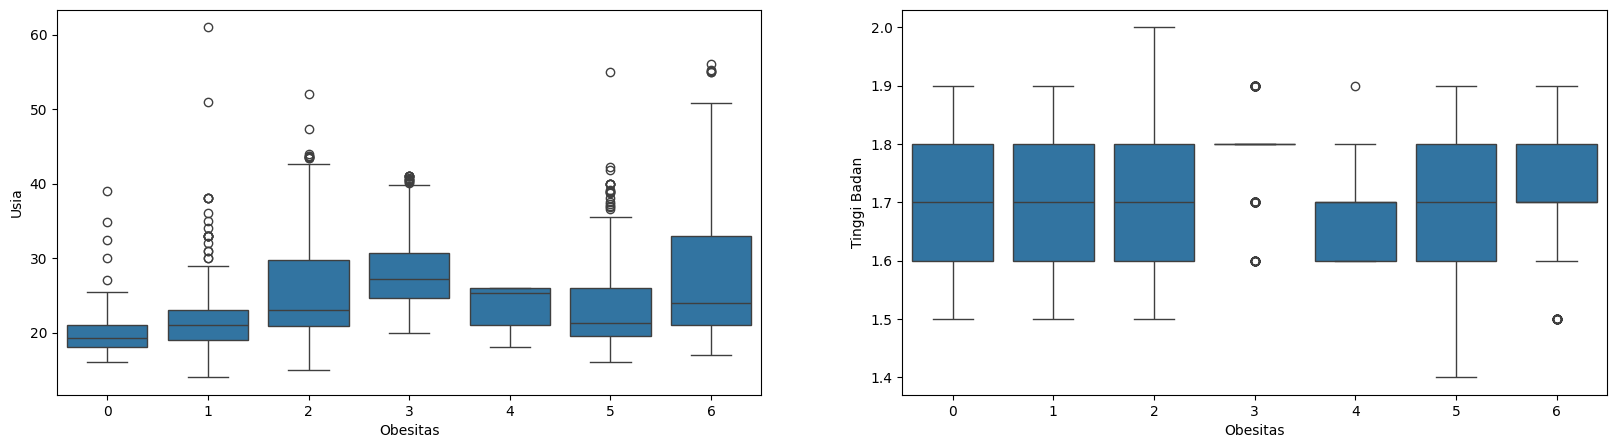

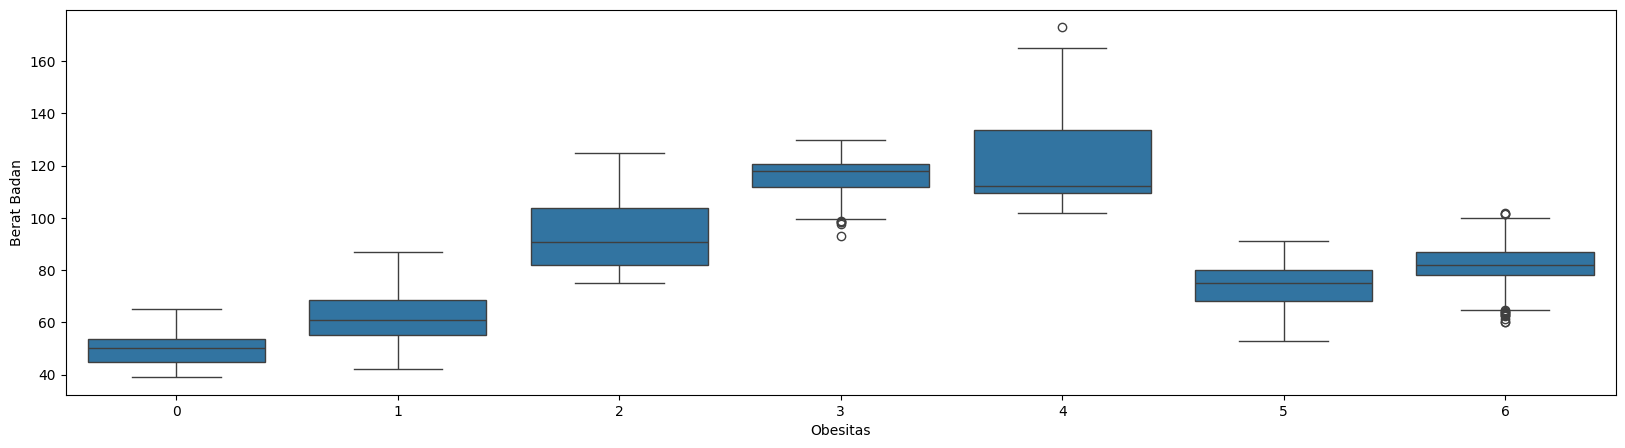

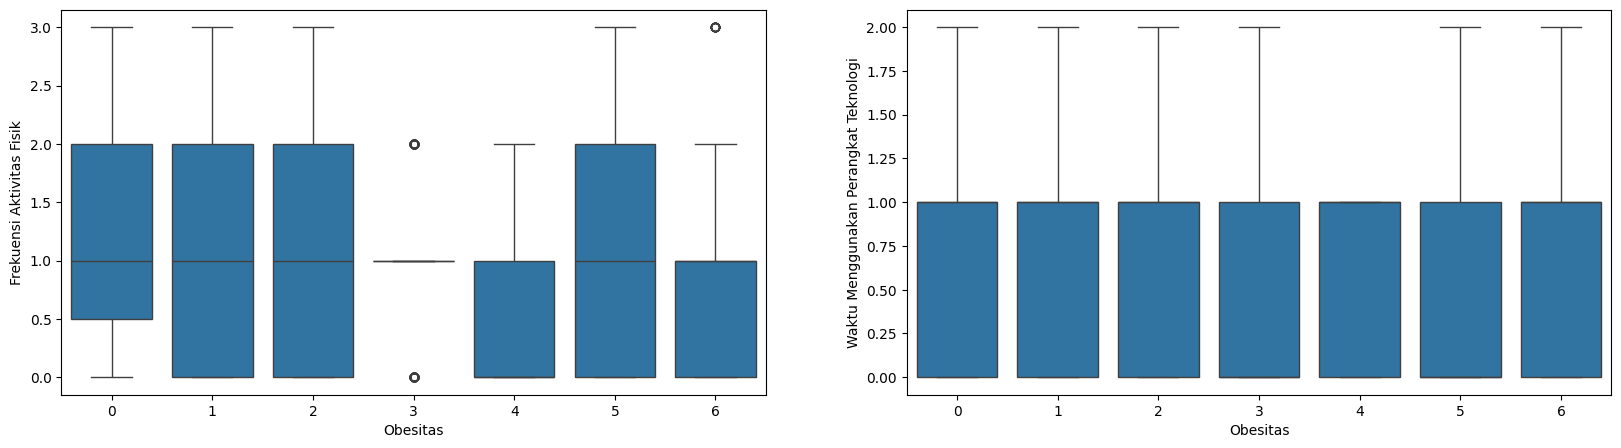

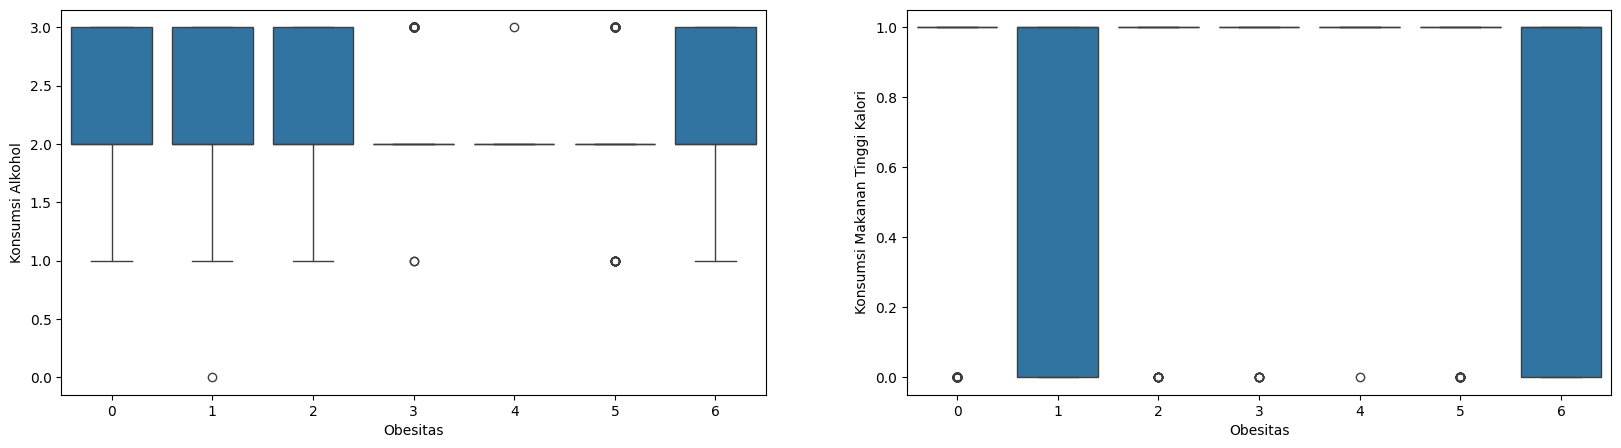

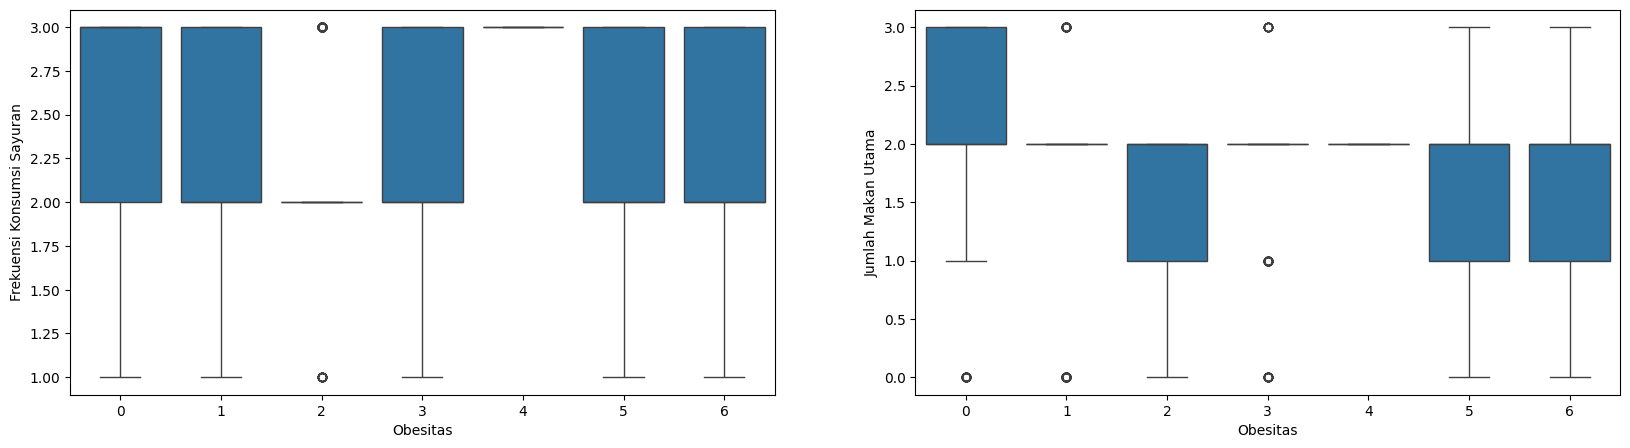

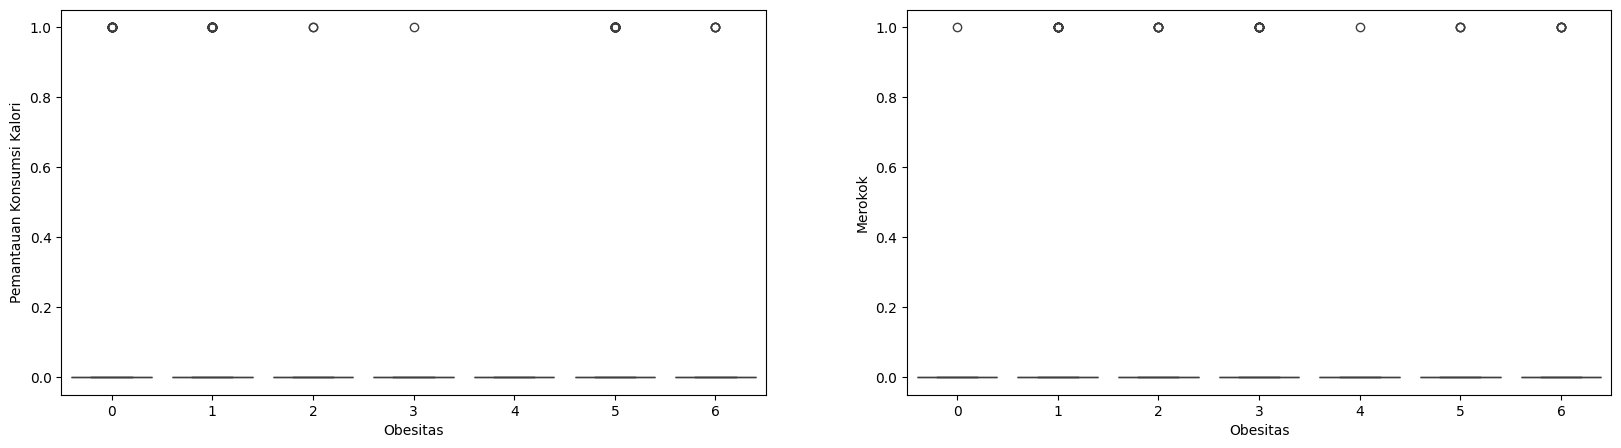

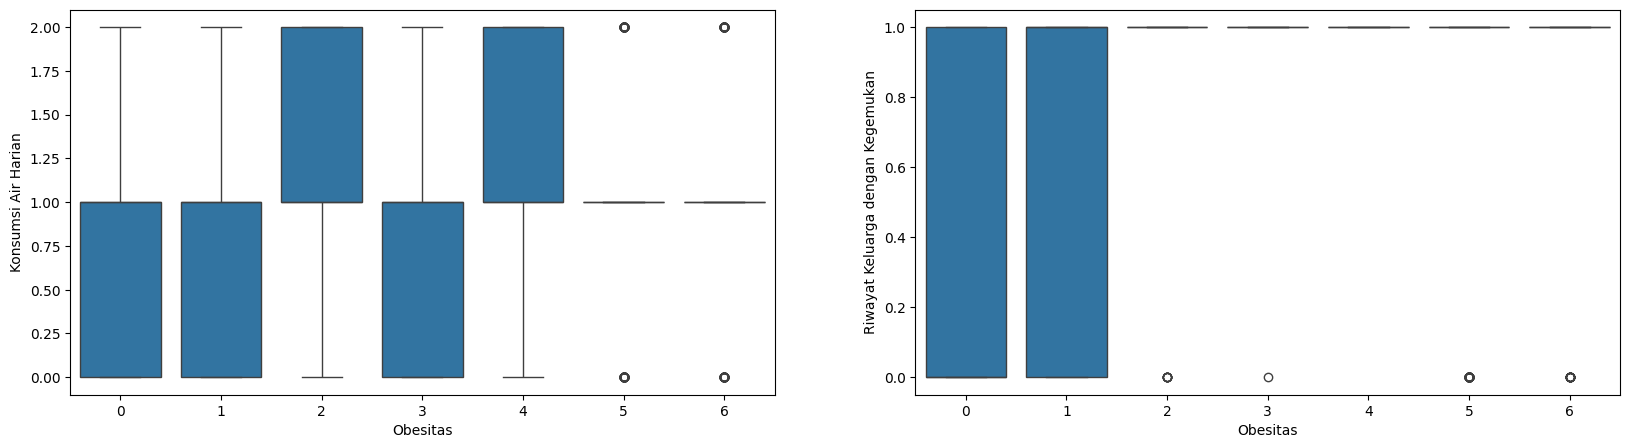

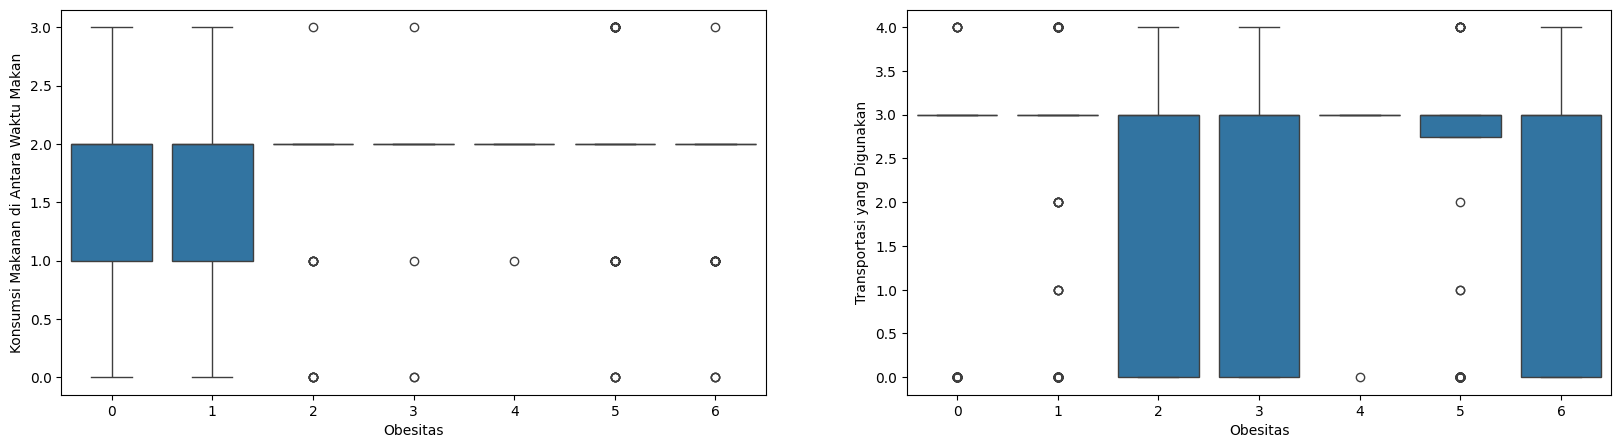

In [25]:
# Subplot 1: Boxplot untuk 'Usia' dan 'Tinggi Badan'
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.boxplot(x='Obesitas', y='Usia', data=data, ax=axes[0])
sns.boxplot(x='Obesitas', y='Tinggi Badan', data=data, ax=axes[1])

# Subplot 2: Boxplot untuk 'Berat Badan'
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
sns.boxplot(x='Obesitas', y='Berat Badan', data=data, ax=ax)

# Subplot 3: Boxplot untuk 'Frekuensi Aktivitas Fisik' dan 'Waktu Menggunakan Perangkat Teknologi'
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.boxplot(x='Obesitas', y='Frekuensi Aktivitas Fisik', data=data, ax=axes[0])
sns.boxplot(x='Obesitas', y='Waktu Menggunakan Perangkat Teknologi', data=data, ax=axes[1])

# Subplot 4: Boxplot untuk 'Konsumsi Alkohol' dan 'Konsumsi Makanan Tinggi Kalori'
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.boxplot(x='Obesitas', y='Konsumsi Alkohol', data=data, ax=axes[0])
sns.boxplot(x='Obesitas', y='Konsumsi Makanan Tinggi Kalori', data=data, ax=axes[1])

# Subplot 5: Boxplot untuk 'Frekuensi Konsumsi Sayuran' dan 'Jumlah Makan Utama'
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.boxplot(x='Obesitas', y='Frekuensi Konsumsi Sayuran', data=data, ax=axes[0])
sns.boxplot(x='Obesitas', y='Jumlah Makan Utama', data=data, ax=axes[1])

# Subplot 6: Boxplot untuk 'Pemantauan Konsumsi Kalori' dan 'Merokok'
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.boxplot(x='Obesitas', y='Pemantauan Konsumsi Kalori', data=data, ax=axes[0])
sns.boxplot(x='Obesitas', y='Merokok', data=data, ax=axes[1])

# Subplot 7: Boxplot untuk 'Konsumsi Air Harian' dan 'Riwayat Keluarga dengan Kegemukan'
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.boxplot(x='Obesitas', y='Konsumsi Air Harian', data=data, ax=axes[0])
sns.boxplot(x='Obesitas', y='Riwayat Keluarga dengan Kegemukan', data=data, ax=axes[1])

# Subplot 8: Boxplot untuk 'Konsumsi Makanan di Antara Waktu Makan' dan 'Transportasi yang Digunakan'
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.boxplot(x='Obesitas', y='Konsumsi Makanan di Antara Waktu Makan', data=data, ax=axes[0])
sns.boxplot(x='Obesitas', y='Transportasi yang Digunakan', data=data, ax=axes[1])

# Tampilkan semua plot
plt.show()

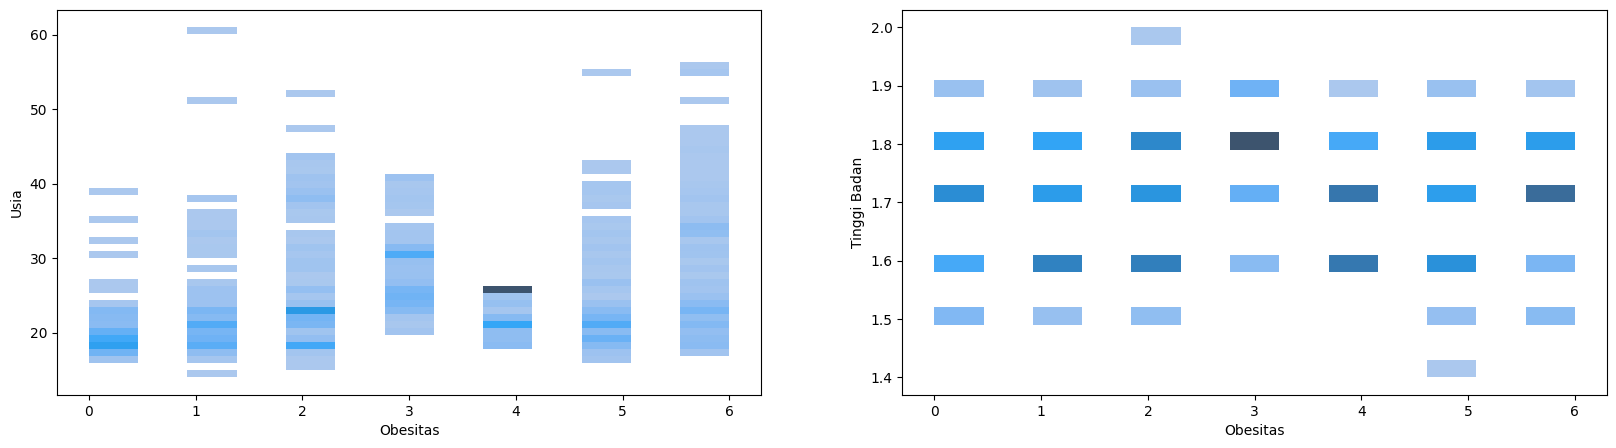

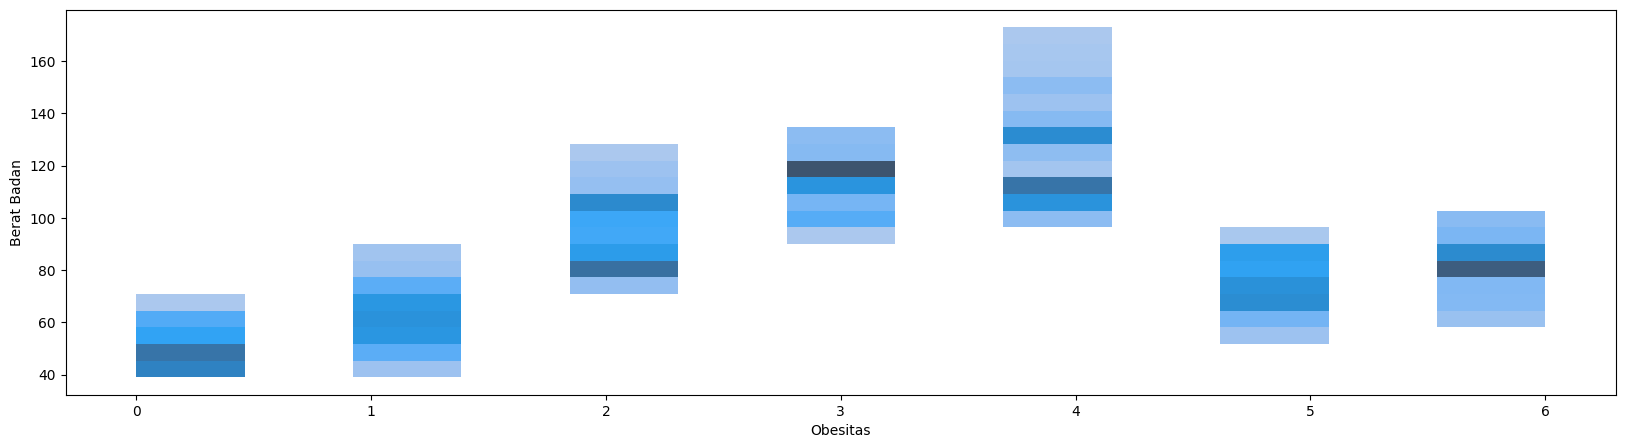

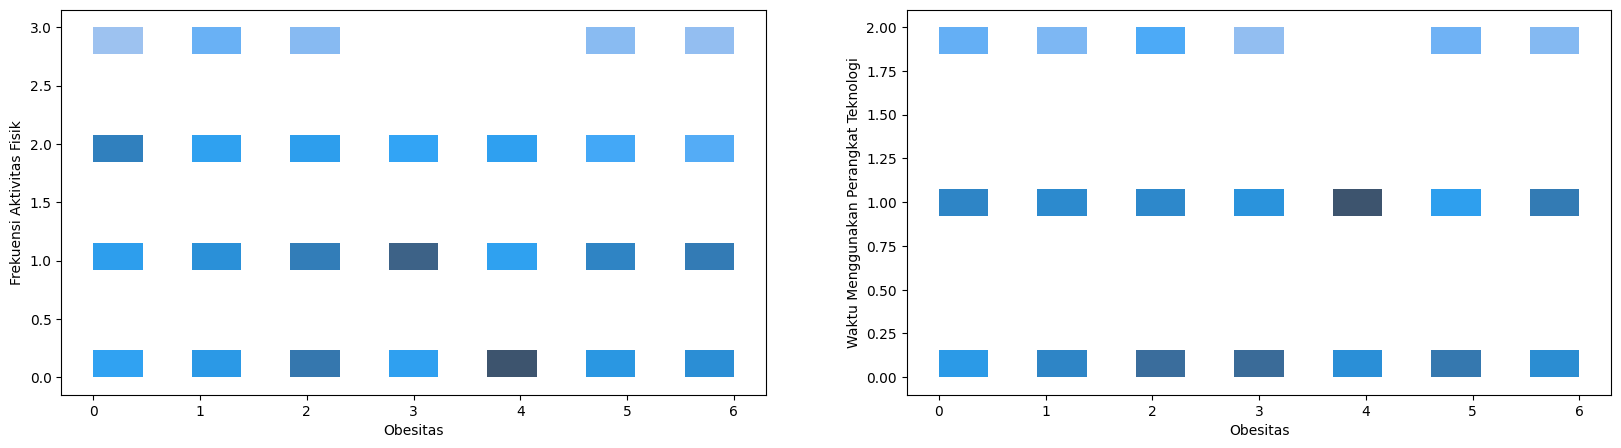

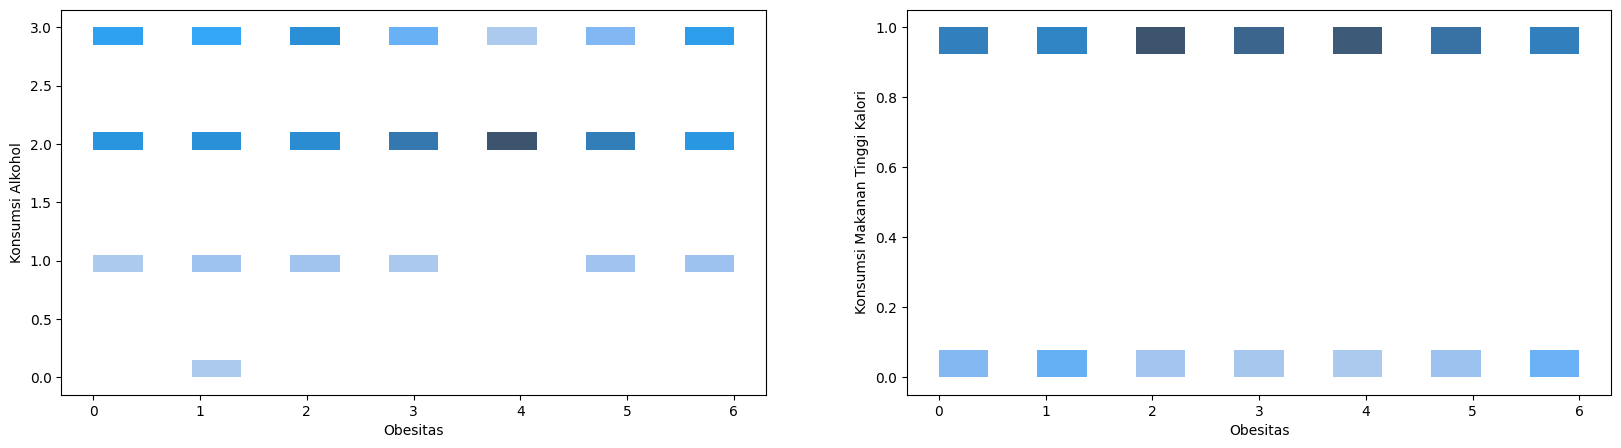

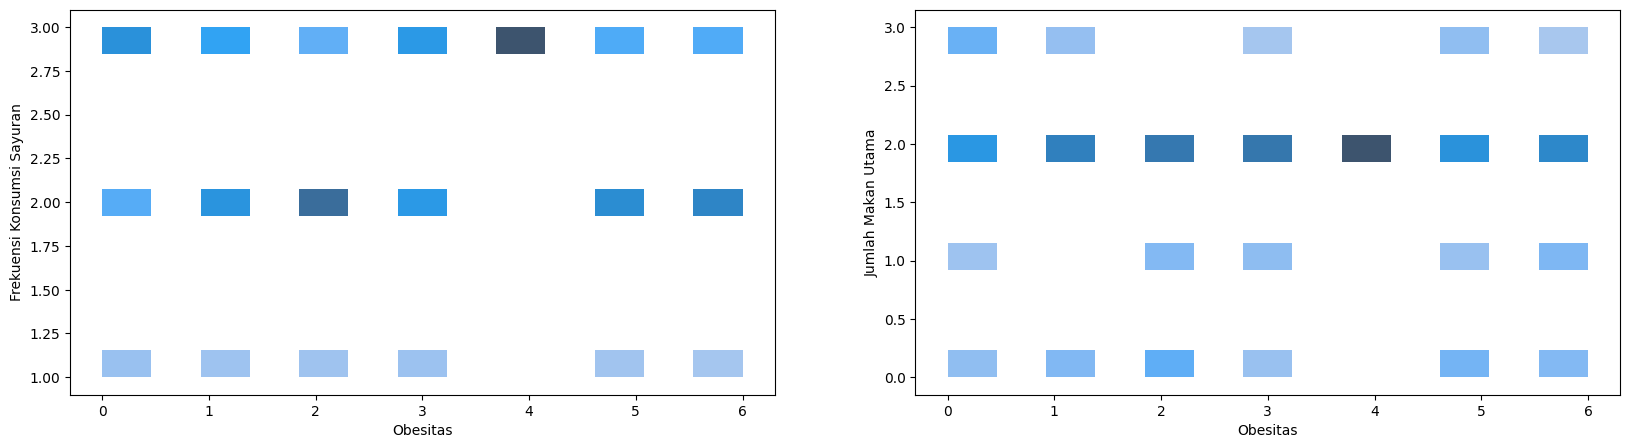

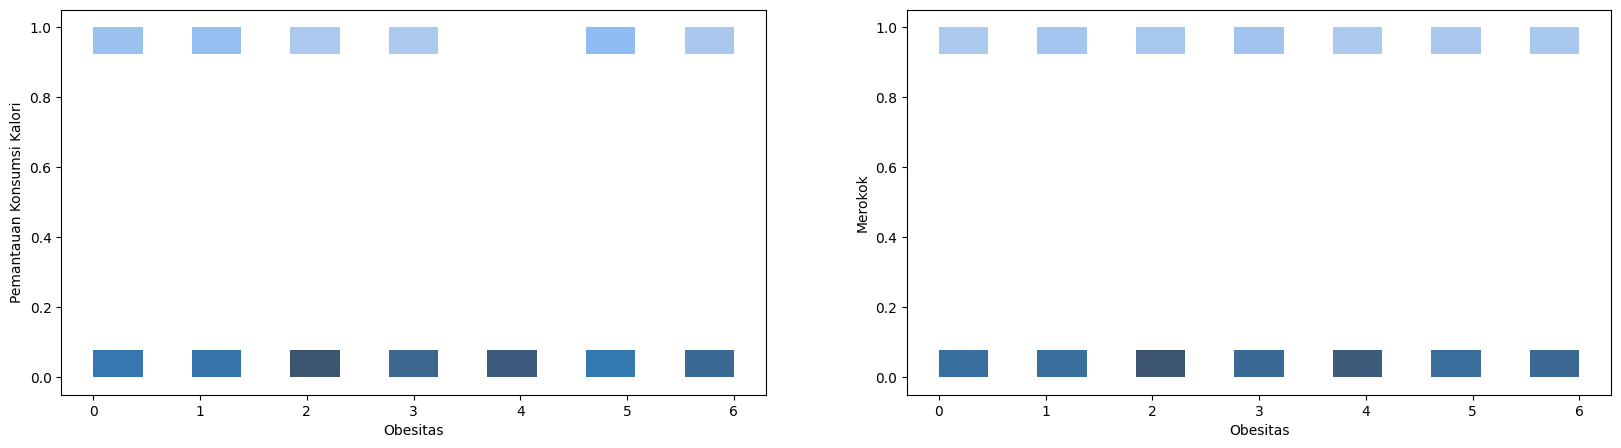

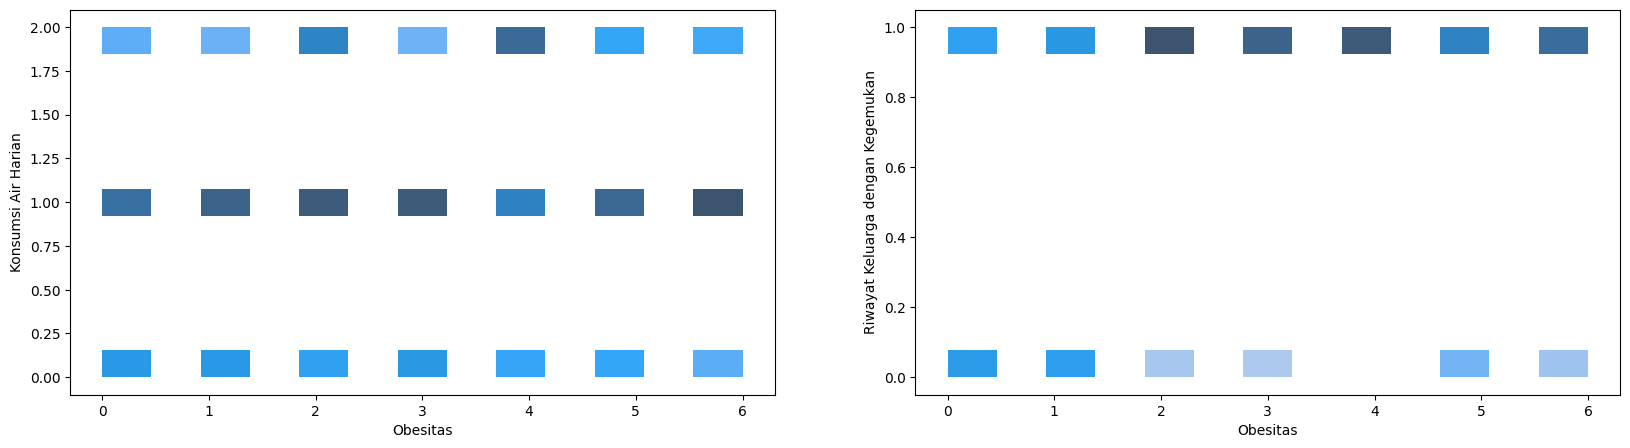

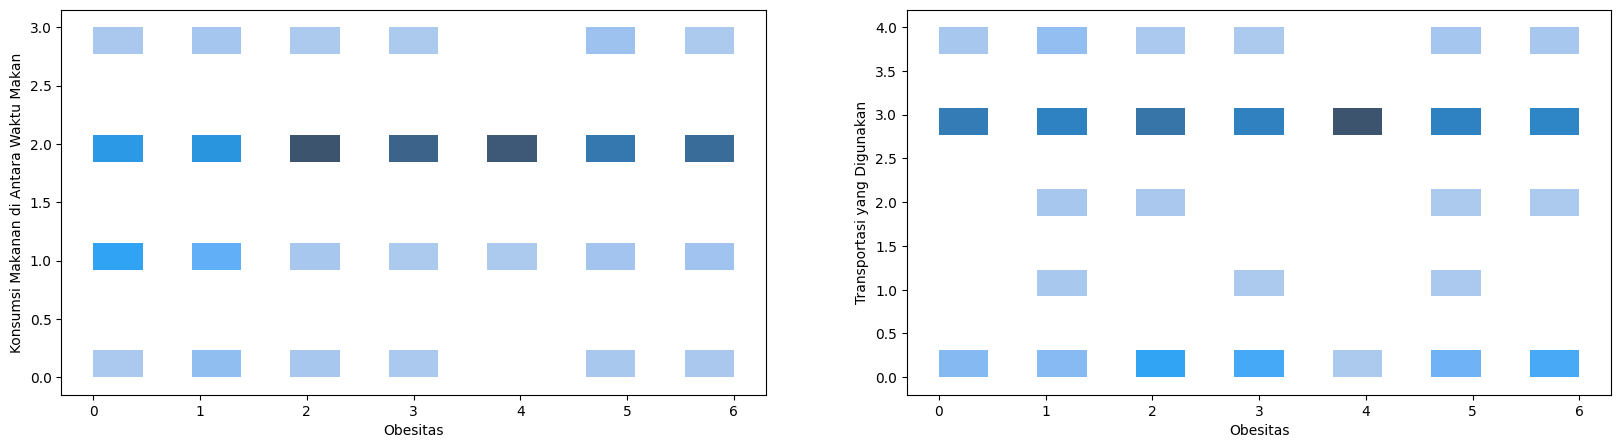

In [26]:
# Subplot 1: Boxplot untuk 'Usia' dan 'Tinggi Badan'
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(x='Obesitas', y='Usia', data=data, ax=axes[0])
sns.histplot(x='Obesitas', y='Tinggi Badan', data=data, ax=axes[1])

# Subplot 2: Boxplot untuk 'Berat Badan'
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
sns.histplot(x='Obesitas', y='Berat Badan', data=data, ax=ax)

# Subplot 3: Boxplot untuk 'Frekuensi Aktivitas Fisik' dan 'Waktu Menggunakan Perangkat Teknologi'
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(x='Obesitas', y='Frekuensi Aktivitas Fisik', data=data, ax=axes[0])
sns.histplot(x='Obesitas', y='Waktu Menggunakan Perangkat Teknologi', data=data, ax=axes[1])

# Subplot 4: Boxplot untuk 'Konsumsi Alkohol' dan 'Konsumsi Makanan Tinggi Kalori'
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(x='Obesitas', y='Konsumsi Alkohol', data=data, ax=axes[0])
sns.histplot(x='Obesitas', y='Konsumsi Makanan Tinggi Kalori', data=data, ax=axes[1])

# Subplot 5: Boxplot untuk 'Frekuensi Konsumsi Sayuran' dan 'Jumlah Makan Utama'
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(x='Obesitas', y='Frekuensi Konsumsi Sayuran', data=data, ax=axes[0])
sns.histplot(x='Obesitas', y='Jumlah Makan Utama', data=data, ax=axes[1])

# Subplot 6: Boxplot untuk 'Pemantauan Konsumsi Kalori' dan 'Merokok'
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(x='Obesitas', y='Pemantauan Konsumsi Kalori', data=data, ax=axes[0])
sns.histplot(x='Obesitas', y='Merokok', data=data, ax=axes[1])

# Subplot 7: Boxplot untuk 'Konsumsi Air Harian' dan 'Riwayat Keluarga dengan Kegemukan'
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(x='Obesitas', y='Konsumsi Air Harian', data=data, ax=axes[0])
sns.histplot(x='Obesitas', y='Riwayat Keluarga dengan Kegemukan', data=data, ax=axes[1])

# Subplot 8: Boxplot untuk 'Konsumsi Makanan di Antara Waktu Makan' dan 'Transportasi yang Digunakan'
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(x='Obesitas', y='Konsumsi Makanan di Antara Waktu Makan', data=data, ax=axes[0])
sns.histplot(x='Obesitas', y='Transportasi yang Digunakan', data=data, ax=axes[1])

# Tampilkan semua plot
plt.show()

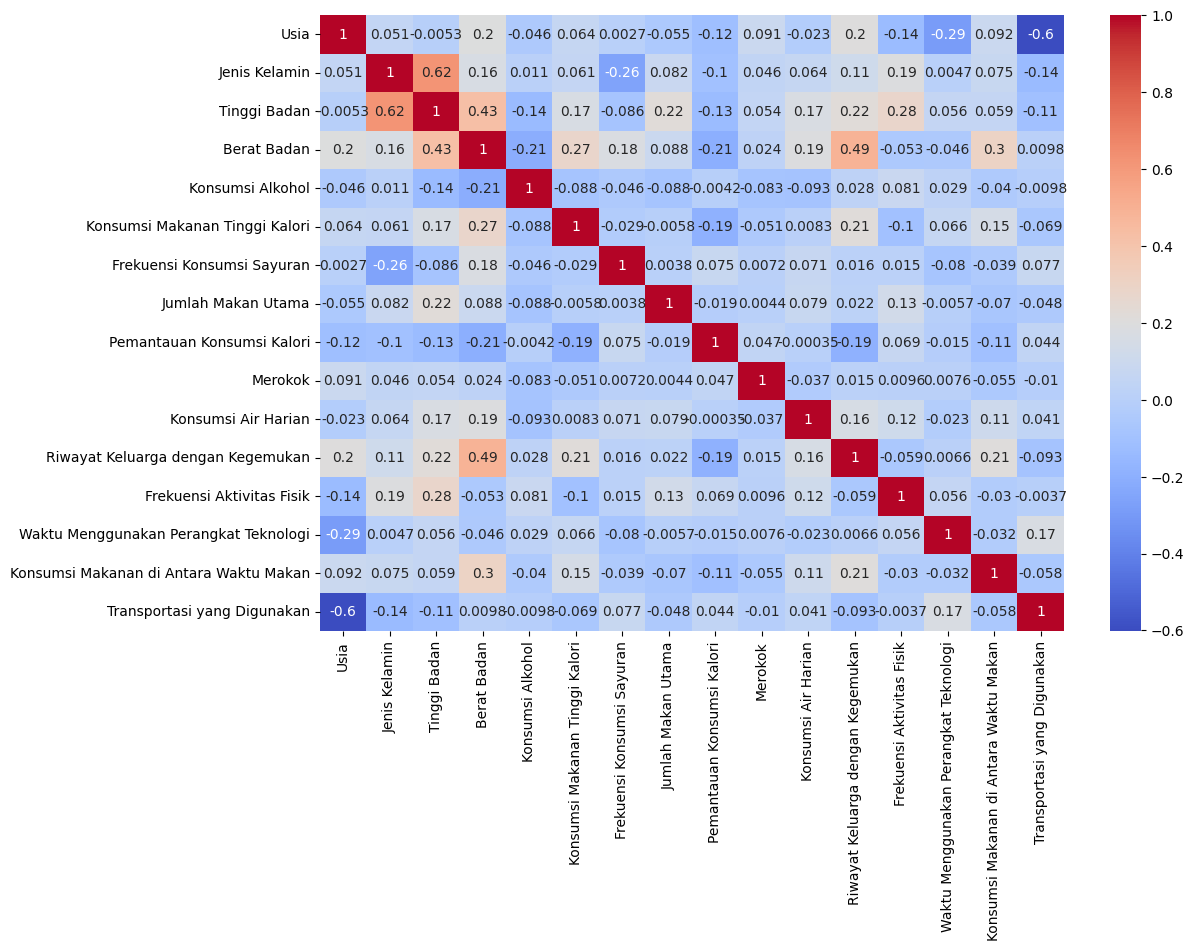

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerik].corr(), annot=True, cmap='coolwarm')
plt.show()

In [28]:
# Hapus variabel yang kurang berpengaruh
data = data.drop(columns=["Merokok", "Pemantauan Konsumsi Kalori", "Transportasi yang Digunakan",
                          "Frekuensi Konsumsi Sayuran", "Jumlah Makan Utama", "Konsumsi Air Harian", "Konsumsi Alkohol"])

In [29]:
numerik = ['Usia','Jenis Kelamin', 'Tinggi Badan', 'Berat Badan', 'Konsumsi Makanan Tinggi Kalori',
                               'Riwayat Keluarga dengan Kegemukan', 'Frekuensi Aktivitas Fisik', 'Waktu Menggunakan Perangkat Teknologi',
                              'Konsumsi Makanan di Antara Waktu Makan']

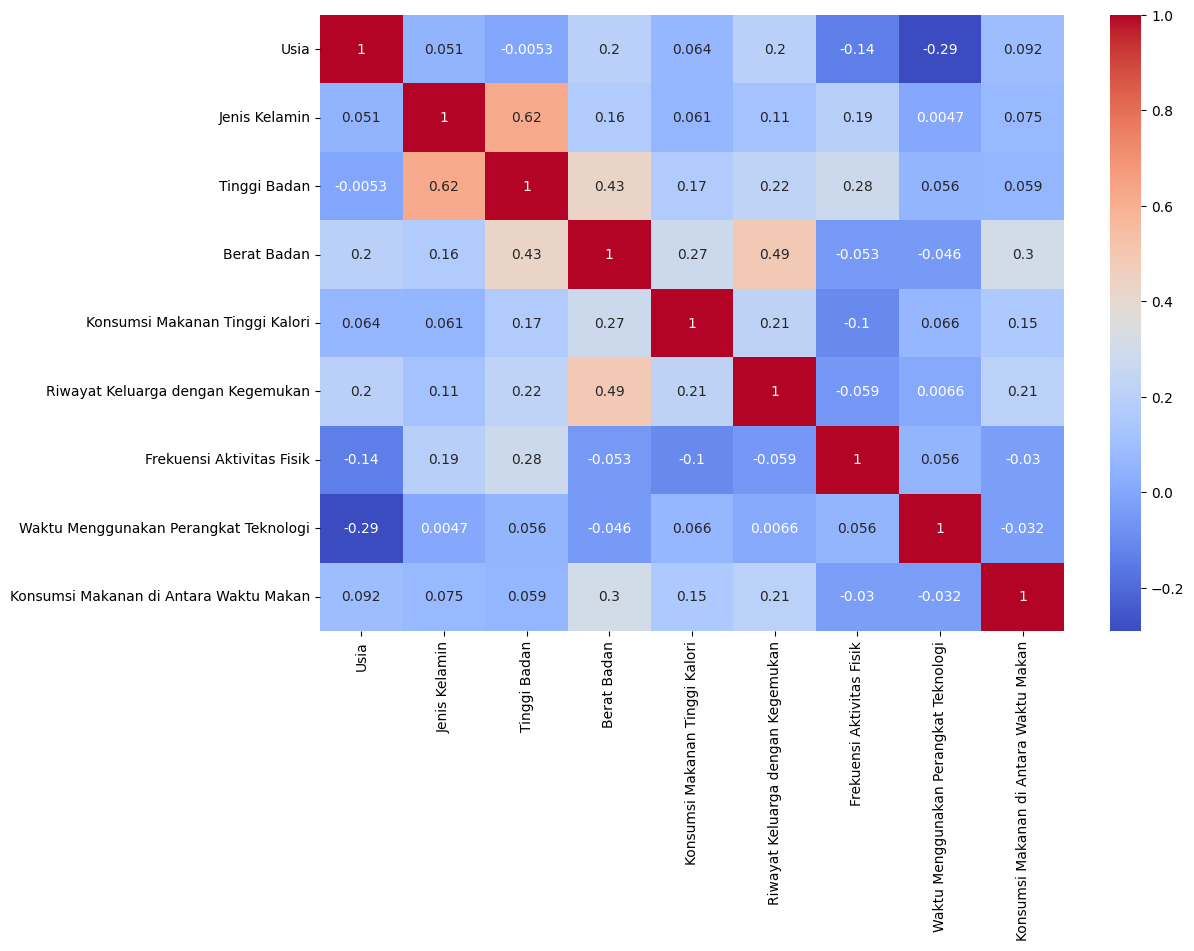

In [30]:
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerik].corr(), annot=True, cmap='coolwarm')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'xaxis'

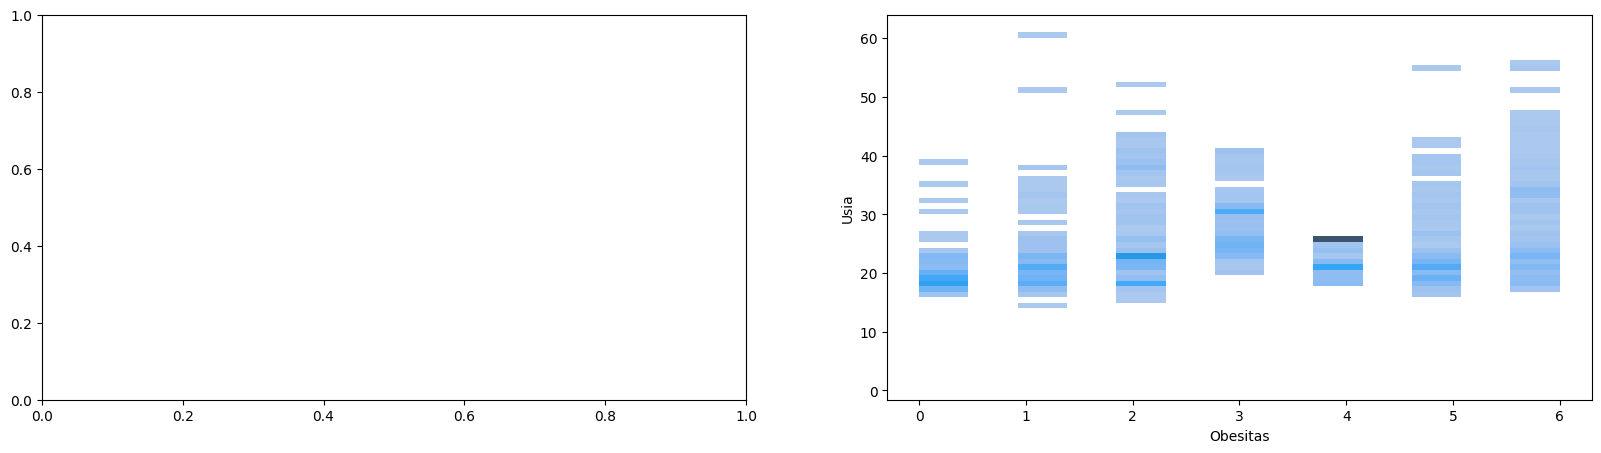

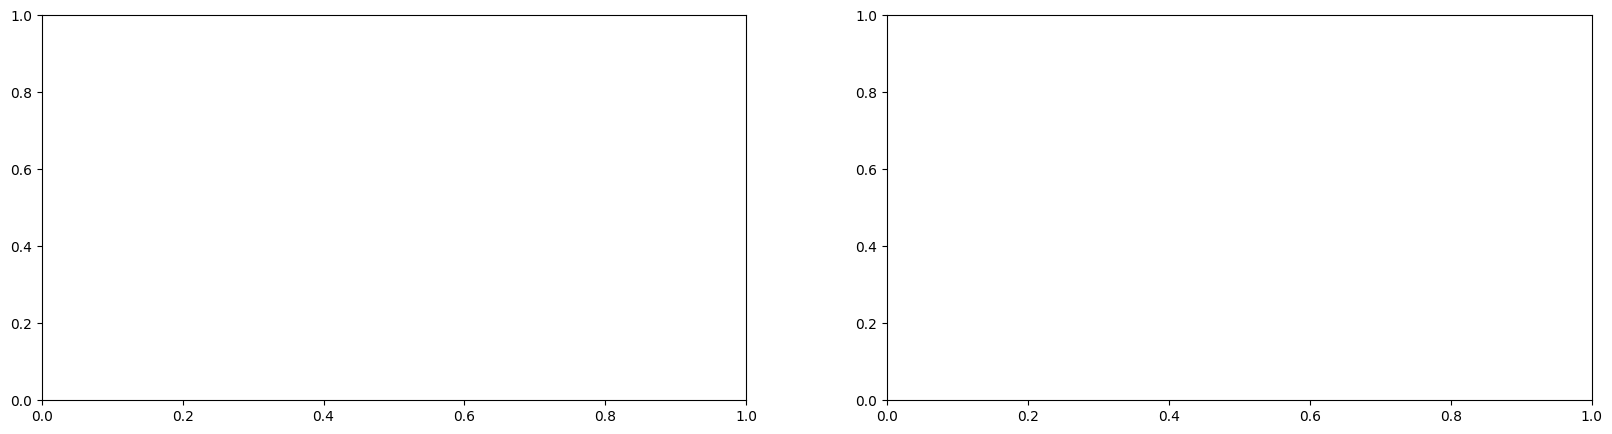

In [31]:
# Subplot 1: Boxplot untuk 'Usia' dan 'Tinggi Badan'
fig, axes = plt.subplots(1,2, figsize=(20, 5))
sns.histplot(x='Obesitas', y='Usia', data=data, ax=axes[1])
sns.histplot(x='Obesitas', y='Tinggi Badan', data=data, ax=axes[1])

# Subplot 2: Boxplot untuk 'Berat Badan'
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(x='Obesitas', y='Berat Badan', data=data, ax=ax)
sns.histplot(x='Obesitas', y='Jenis Kelamin', data=data, ax=ax)

# Subplot 4: Boxplot untuk 'Konsumsi Alkohol' dan 'Konsumsi Makanan Tinggi Kalori'
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(x='Obesitas', y='Konsumsi Makanan Tinggi Kalori', data=data, ax=axes[1])
sns.histplot(x='Obesitas', y='Riwayat Keluarga dengan Kegemukan', data=data, ax=axes[1])

# Subplot 5: Boxplot untuk 'Frekuensi Konsumsi Sayuran' dan 'Jumlah Makan Utama'
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(x='Obesitas', y='Frekuensi Aktivitas Fisik', data=data, ax=axes[0])
sns.histplot(x='Obesitas', y='Konsumsi Makanan di Antara Waktu Makan', data=data, ax=axes[1])

# Tampilkan semua plot
plt.show()

In [32]:
Y = data['Obesitas']
Y

0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: Obesitas, Length: 2087, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [34]:
from collections import Counter
print(f'Banyak train: {Counter(y_train)}')
print(f'Banyak test: {Counter(y_test)}')

Banyak train: Counter({2: 276, 4: 264, 1: 231, 6: 230, 3: 227, 0: 221, 5: 220})
Banyak test: Counter({2: 75, 3: 70, 6: 60, 4: 60, 5: 56, 1: 51, 0: 46})


In [35]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier()
dtr.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
dtr.predict(X_test)

array([3, 1, 6, 3, 2, 1, 3, 4, 2, 5, 1, 6, 6, 2, 2, 5, 5, 5, 4, 3, 5, 0,
       6, 4, 5, 3, 2, 3, 4, 2, 2, 4, 0, 6, 1, 6, 6, 4, 3, 5, 3, 1, 6, 3,
       2, 3, 3, 6, 3, 6, 6, 0, 4, 6, 2, 0, 1, 2, 0, 0, 6, 5, 2, 0, 6, 6,
       2, 5, 2, 1, 5, 0, 6, 2, 5, 1, 6, 5, 0, 6, 0, 0, 4, 1, 2, 5, 4, 1,
       5, 3, 2, 1, 6, 2, 3, 4, 1, 2, 6, 1, 2, 6, 6, 2, 5, 1, 6, 1, 5, 3,
       2, 1, 1, 0, 6, 1, 5, 3, 4, 4, 4, 4, 3, 3, 6, 4, 3, 3, 1, 5, 5, 5,
       3, 3, 2, 3, 6, 3, 5, 4, 4, 5, 2, 2, 4, 4, 2, 4, 2, 4, 2, 3, 5, 3,
       3, 6, 0, 1, 0, 5, 1, 4, 0, 5, 0, 4, 1, 3, 6, 3, 4, 4, 2, 2, 1, 1,
       2, 5, 2, 2, 4, 5, 3, 1, 2, 4, 2, 1, 2, 4, 0, 0, 4, 5, 1, 0, 0, 2,
       1, 2, 2, 1, 1, 4, 6, 2, 5, 2, 0, 6, 5, 4, 4, 3, 4, 3, 2, 5, 3, 3,
       6, 2, 0, 6, 1, 3, 3, 2, 2, 6, 1, 1, 5, 2, 3, 6, 2, 4, 0, 0, 2, 6,
       4, 6, 5, 5, 3, 5, 2, 4, 4, 1, 0, 4, 3, 3, 6, 6, 4, 1, 0, 3, 2, 3,
       6, 6, 5, 3, 4, 5, 3, 1, 2, 0, 0, 2, 4, 4, 1, 4, 0, 1, 5, 0, 0, 6,
       3, 3, 2, 4, 2, 5, 1, 4, 4, 0, 6, 0, 5, 6, 0,

In [37]:
# Akurasi Decision Tree
acc_dtr = dtr.score(X_test,y_test)
acc_dtr

0.9473684210526315

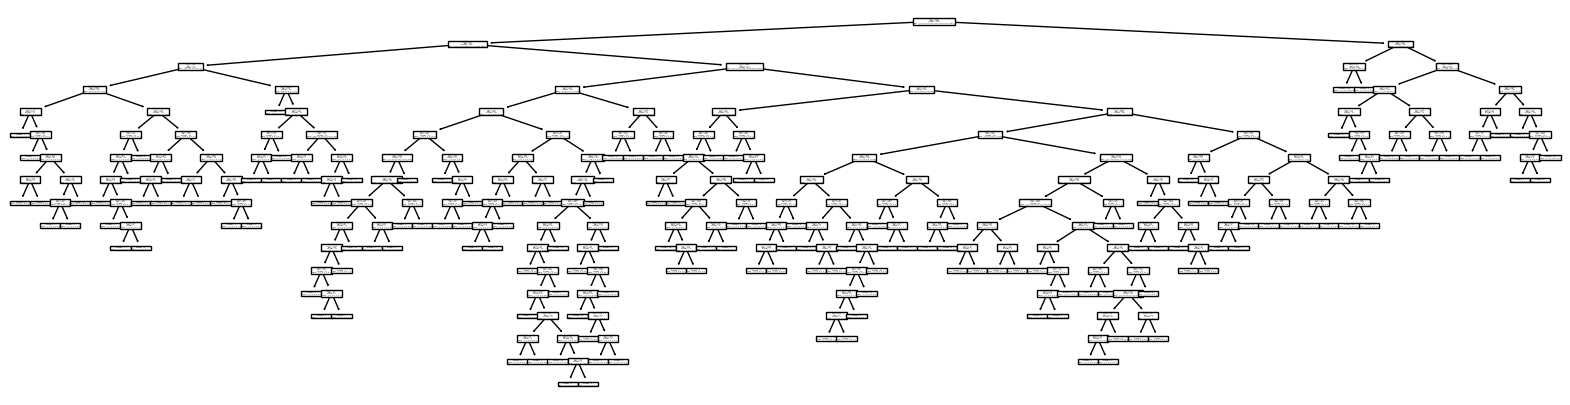

In [38]:
from sklearn import tree
plt.figure(figsize=(20,5))
tree.plot_tree(dtr)
plt.show()

In [40]:
import graphviz

ddata = tree.export_graphviz(dtr)
graphviz.Source(ddata,filename='gambar.png', format='png')

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [41]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [42]:
knn.predict(X_test)

array([3, 0, 6, 3, 2, 5, 3, 4, 5, 6, 5, 6, 6, 2, 2, 5, 5, 5, 4, 3, 5, 0,
       6, 4, 5, 3, 2, 3, 4, 2, 2, 4, 0, 6, 0, 1, 6, 4, 2, 5, 3, 6, 6, 3,
       2, 3, 3, 6, 3, 2, 6, 0, 4, 6, 2, 0, 1, 2, 0, 0, 6, 6, 2, 0, 6, 6,
       2, 5, 2, 1, 5, 0, 6, 2, 5, 5, 2, 6, 0, 6, 0, 0, 4, 1, 2, 5, 4, 0,
       6, 3, 2, 0, 2, 2, 3, 4, 1, 2, 6, 1, 2, 6, 3, 5, 5, 5, 6, 6, 5, 3,
       2, 6, 5, 0, 6, 5, 5, 3, 4, 4, 4, 4, 3, 3, 6, 4, 3, 3, 0, 5, 5, 5,
       3, 3, 2, 3, 6, 3, 5, 4, 4, 6, 2, 2, 4, 4, 2, 4, 6, 4, 2, 3, 5, 3,
       3, 6, 0, 1, 0, 2, 0, 4, 0, 5, 0, 4, 1, 3, 6, 3, 4, 4, 2, 2, 1, 0,
       2, 5, 6, 6, 4, 5, 3, 1, 2, 4, 2, 1, 2, 4, 1, 0, 4, 6, 5, 0, 0, 2,
       0, 2, 2, 1, 1, 4, 1, 2, 5, 2, 0, 6, 5, 4, 4, 3, 4, 3, 2, 5, 3, 4,
       6, 2, 0, 6, 0, 3, 3, 2, 2, 6, 1, 1, 5, 2, 3, 6, 2, 4, 0, 0, 2, 6,
       4, 6, 5, 5, 3, 5, 2, 4, 4, 1, 0, 4, 3, 3, 6, 6, 4, 5, 0, 3, 2, 3,
       5, 6, 5, 3, 4, 5, 3, 1, 2, 0, 0, 5, 4, 4, 1, 4, 0, 5, 5, 0, 0, 6,
       3, 3, 2, 4, 2, 5, 1, 3, 4, 0, 5, 0, 5, 1, 0,

In [43]:
# Akurasi KNN
acc_knn = knn.score(X_test,y_test)
acc_knn

0.8779904306220095

In [44]:
# Naive Bayees
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [45]:
nb.predict(X_test)

array([3, 0, 1, 3, 5, 1, 3, 4, 6, 1, 0, 1, 3, 3, 2, 6, 2, 2, 4, 3, 2, 0,
       2, 4, 2, 3, 2, 3, 4, 2, 2, 4, 0, 2, 1, 2, 1, 4, 2, 2, 3, 5, 2, 3,
       5, 3, 2, 5, 3, 6, 2, 0, 4, 2, 2, 0, 0, 2, 0, 2, 2, 5, 2, 0, 6, 2,
       2, 2, 2, 5, 2, 1, 3, 6, 2, 5, 2, 2, 0, 1, 0, 0, 4, 6, 2, 2, 4, 0,
       6, 3, 2, 0, 2, 2, 3, 4, 5, 2, 2, 1, 2, 2, 3, 1, 2, 6, 2, 1, 2, 3,
       2, 5, 1, 0, 6, 5, 2, 3, 4, 4, 4, 4, 3, 3, 3, 4, 3, 3, 0, 5, 2, 2,
       3, 3, 2, 3, 2, 3, 5, 4, 4, 5, 2, 3, 4, 4, 2, 4, 5, 4, 2, 3, 2, 3,
       2, 1, 0, 1, 0, 2, 0, 4, 2, 2, 0, 4, 0, 3, 3, 3, 4, 4, 2, 3, 1, 4,
       3, 2, 2, 2, 4, 2, 3, 0, 4, 4, 2, 5, 3, 4, 0, 0, 4, 2, 5, 0, 0, 2,
       0, 3, 3, 1, 6, 4, 1, 2, 6, 2, 0, 2, 5, 4, 4, 3, 4, 3, 2, 2, 3, 5,
       2, 6, 0, 2, 1, 3, 3, 2, 2, 2, 0, 0, 5, 2, 3, 3, 2, 4, 0, 0, 2, 3,
       4, 2, 5, 2, 3, 2, 2, 4, 4, 2, 0, 4, 3, 3, 2, 2, 4, 0, 0, 3, 2, 3,
       2, 2, 2, 3, 4, 2, 3, 1, 2, 0, 0, 1, 4, 4, 0, 4, 0, 1, 5, 0, 0, 2,
       3, 3, 5, 2, 2, 5, 5, 4, 4, 0, 2, 0, 5, 1, 2,

In [46]:
# Akurasi Naive Bayes
acc_nb = nb.score(X_test,y_test)
acc_nb

0.6076555023923444

In [47]:
# SVM
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train,y_train)

SVC()

In [48]:
sv.predict(X_test)

array([4, 0, 1, 4, 4, 5, 4, 4, 5, 6, 1, 6, 2, 4, 2, 1, 5, 6, 4, 2, 6, 0,
       6, 4, 5, 3, 6, 4, 4, 6, 2, 4, 0, 6, 0, 6, 6, 4, 2, 5, 4, 5, 6, 4,
       4, 3, 4, 6, 3, 6, 2, 0, 4, 6, 6, 1, 0, 2, 0, 1, 6, 1, 2, 0, 5, 6,
       6, 5, 6, 1, 5, 0, 2, 2, 6, 6, 6, 2, 0, 6, 0, 0, 4, 6, 6, 5, 4, 0,
       5, 3, 6, 0, 6, 6, 4, 4, 5, 6, 6, 5, 6, 6, 2, 5, 5, 5, 6, 6, 5, 4,
       2, 5, 5, 0, 2, 6, 2, 3, 4, 4, 4, 4, 4, 3, 2, 4, 3, 3, 0, 5, 5, 5,
       4, 3, 2, 4, 6, 4, 1, 4, 4, 5, 2, 4, 4, 4, 6, 4, 6, 4, 6, 4, 6, 3,
       2, 1, 0, 1, 0, 6, 0, 4, 1, 6, 0, 4, 1, 4, 2, 3, 4, 4, 2, 2, 5, 0,
       4, 1, 6, 6, 4, 5, 3, 0, 6, 4, 2, 5, 4, 4, 0, 0, 4, 6, 5, 0, 0, 2,
       0, 4, 2, 1, 1, 4, 1, 6, 5, 2, 1, 6, 5, 4, 4, 4, 4, 3, 6, 6, 3, 4,
       6, 2, 0, 6, 0, 3, 3, 6, 3, 6, 1, 1, 6, 6, 3, 2, 2, 4, 0, 0, 6, 2,
       4, 2, 6, 1, 4, 6, 2, 4, 4, 1, 0, 4, 3, 4, 6, 6, 4, 1, 0, 3, 2, 3,
       5, 2, 6, 3, 4, 5, 3, 1, 6, 0, 0, 5, 4, 4, 1, 4, 1, 5, 6, 1, 0, 6,
       4, 3, 4, 4, 6, 6, 1, 4, 4, 0, 2, 0, 1, 1, 1,

In [49]:
# Akurasi SVM
acc_svm = sv.score(X_test,y_test)
acc_svm

0.5430622009569378

In [50]:
list_model = ['Decision Tree','KNN','Naive Bayes','SVM']
accuracy = [acc_dtr, acc_knn, acc_nb, acc_svm]

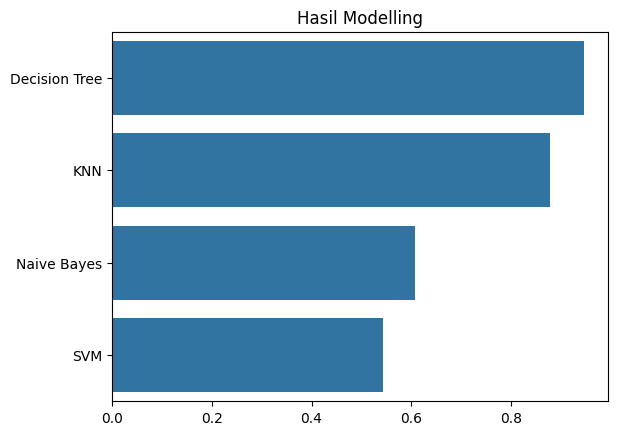

In [51]:
sns.barplot(x=accuracy,y=list_model)
plt.title('Hasil Modelling')
plt.show()

In [53]:
import pickle

# Misalnya model sudah dilatih menggunakan algoritma tertentu
model = dtr

# Simpan model ke file menggunakan Pickle
with open('model_obesitas.pkl', 'rb') as file:
    pickle.dump(model, file)


FileNotFoundError: [Errno 2] No such file or directory: 'model_obesitas.pkl'

In [55]:
import pickle

filename = 'prediksi_obesitas.wav'
pickle.dump(model,open(filename,'wb'))

In [ ]:
import numpy as np
import pickle
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok

# Muat model yang telah disimpan dengan Pickle
with open('model_obesitas.pkl', 'rb') as file:
    model = pickle.load(file)

# Inisialisasi Flask app
app = Flask(__name__)
run_with_ngrok(app)  # Untuk membuat URL publik menggunakan ngrok

# Rute untuk menerima data dari frontend dan memberikan prediksi
@app.route('/api/predict', methods=['POST'])
def predict_obesity():
    data = request.json

    # Ambil data input dari request JSON
    usia = int(data['usia'])
    jenis_kelamin = 1 if data['jenis_kelamin'] == 'laki-laki' else 0
    tinggi_badan = float(data['tinggi_badan'])
    berat_badan = float(data['berat_badan'])
    konsumsi_kalori = int(data['konsumsi_kalori'])
    riwayat_keluarga = 1 if data['riwayat_keluarga'] == 'ya' else 0
    aktivitas_fisik = float(data['aktivitas_fisik'])
    waktu_teknologi = float(data['waktu_teknologi'])
    makanan_selingan = int(data['makanan_selingan'])

    # Data input dalam bentuk array untuk dimasukkan ke model
    input_data = np.array([[usia, jenis_kelamin, tinggi_badan, berat_badan,
                            konsumsi_kalori, riwayat_keluarga, aktivitas_fisik,
                            waktu_teknologi, makanan_selingan]])

    # Prediksi menggunakan model yang sudah dimuat
    prediction = model.predict(input_data)

    # Kembalikan hasil prediksi dalam format JSON
    result = {'prediction': prediction[0]}
    return jsonify(result)

# Jalankan aplikasi Flask
app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-11:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 199, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 789, in urlopen
    response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packages/urll